## k-means text clustering

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Load the dataset
df = pd.read_csv('Processed Data/restaurantreviews_New_York.csv')

# Handling missing values in the 'text' column
df = df.dropna(subset=['text'])

# Take a random sample of 10,000 rows
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)

# Extract the text data from the sample
text_data = df_sample['text']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Determine the optimal number of clusters using silhouette score
max_clusters = 10  # You can adjust this based on your dataset
best_score = -1
best_n_clusters = 2

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)

    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

# Perform k-means clustering with the optimal number of clusters on the full dataset
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the sampled dataframe
df_sample['cluster_label'] = kmeans.labels_

# Print the distribution of reviews in each cluster in the sampled dataset
print("Distribution of reviews in each cluster in the sampled dataset:")
print(df_sample['cluster_label'].value_counts())

# Optionally, you can save the sampled dataframe with cluster labels to a new CSV file
df_sample.to_csv('NYCrestaurantreviews_sampled_with_clusters.csv', index=False)


Number of clusters: 2, Silhouette Score: 0.0040653638692971
Number of clusters: 3, Silhouette Score: 0.0032180026204590823
Number of clusters: 4, Silhouette Score: 0.00786271489269469
Number of clusters: 5, Silhouette Score: 0.007309921863243878
Number of clusters: 6, Silhouette Score: 0.010337699133284908
Number of clusters: 7, Silhouette Score: 0.013958132637143954
Number of clusters: 8, Silhouette Score: 0.009919467114220436
Number of clusters: 9, Silhouette Score: -0.0067463497011966776
Number of clusters: 10, Silhouette Score: -0.0013786343639109792
Distribution of reviews in each cluster in the sampled dataset:
cluster_label
0    7286
6     622
2     600
5     539
1     418
3     292
4     243
Name: count, dtype: int64


In [5]:
# Get the top N features for each cluster
from wordcloud import WordCloud
import matplotlib.pyplot as plt

N = 10
for cluster_label in range(best_n_clusters):
    cluster_center = kmeans.cluster_centers_[cluster_label]
    top_features_idx = cluster_center.argsort()[-N:][::-1]
    top_features = [vectorizer.get_feature_names_out()[idx] for idx in top_features_idx]
    
    print(f"Top keywords for Cluster {cluster_label}: {', '.join(top_features)}")


Top keywords for Cluster 0: food, great, good, service, place, delicious, amazing, staff, friendly, time
Top keywords for Cluster 1: nice, place, good, food, staff, people, clean, great, service, atmosphere
Top keywords for Cluster 2: good, food, service, place, friendly, prices, great, staff, fast, pretty
Top keywords for Cluster 3: love, place, food, great, service, coffee, good, atmosphere, fresh, amazing
Top keywords for Cluster 4: excellent, service, food, great, staff, atmosphere, excelente, translated, google, original
Top keywords for Cluster 5: best, food, town, pizza, ve, place, area, nyc, great, coffee
Top keywords for Cluster 6: great, food, service, place, atmosphere, friendly, staff, prices, good, awesome


In [7]:
from textblob import TextBlob

# Compute sentiment scores for each review
df_sample['sentiment'] = df_sample['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print average sentiment for each cluster
for cluster_label in range(best_n_clusters):
    avg_sentiment = df_sample[df_sample['cluster_label'] == cluster_label]['sentiment'].mean()
    print(f"Average sentiment for Cluster {cluster_label}: {avg_sentiment:.2f}")


Average sentiment for Cluster 0: 0.31
Average sentiment for Cluster 1: 0.54
Average sentiment for Cluster 2: 0.61
Average sentiment for Cluster 3: 0.52
Average sentiment for Cluster 4: 0.80
Average sentiment for Cluster 5: 0.75
Average sentiment for Cluster 6: 0.76


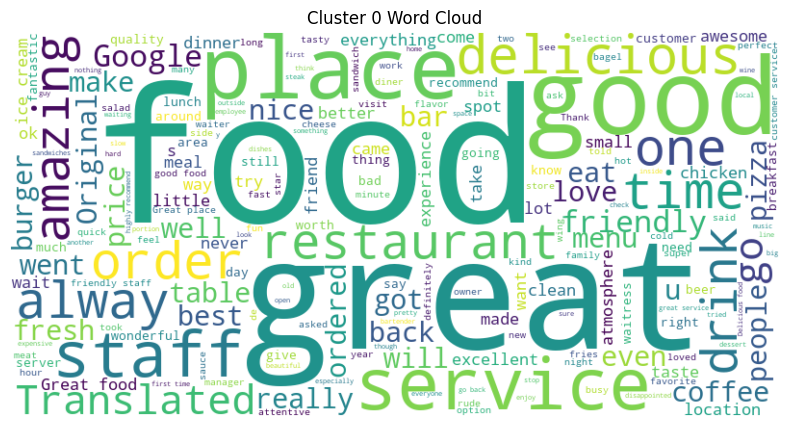

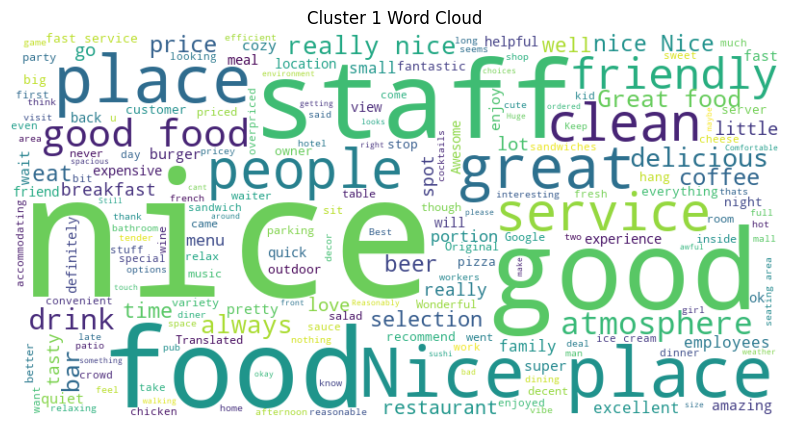

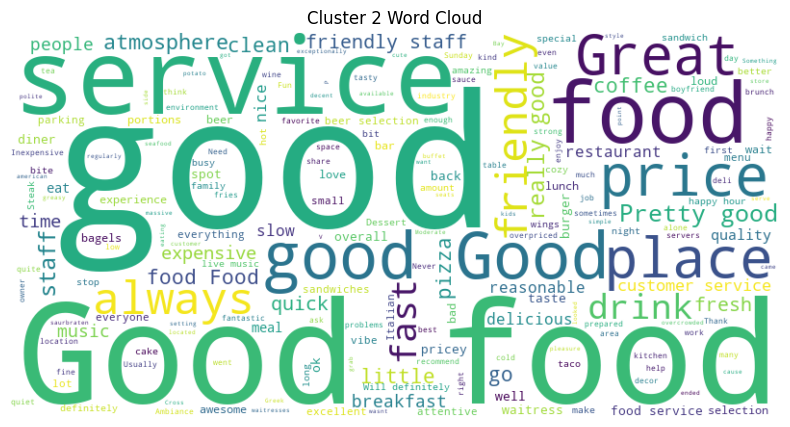

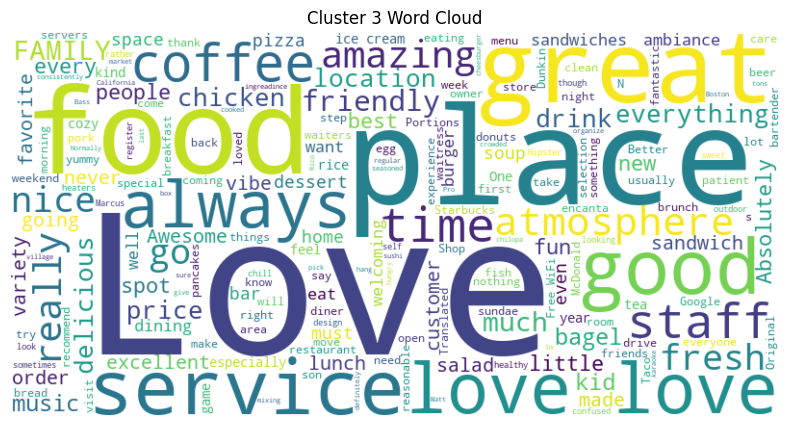

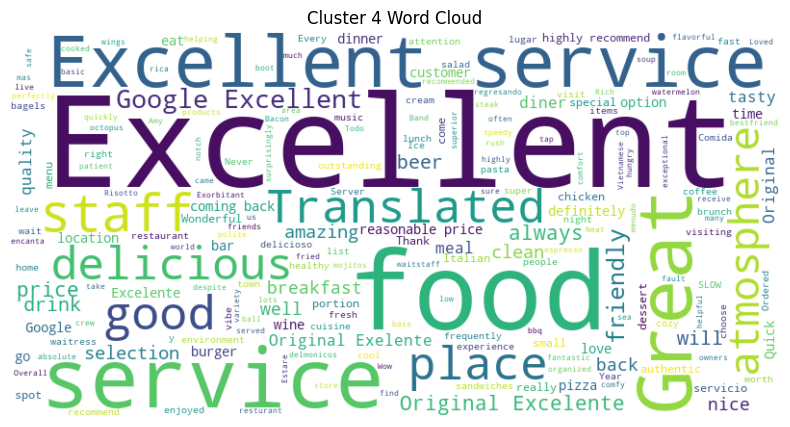

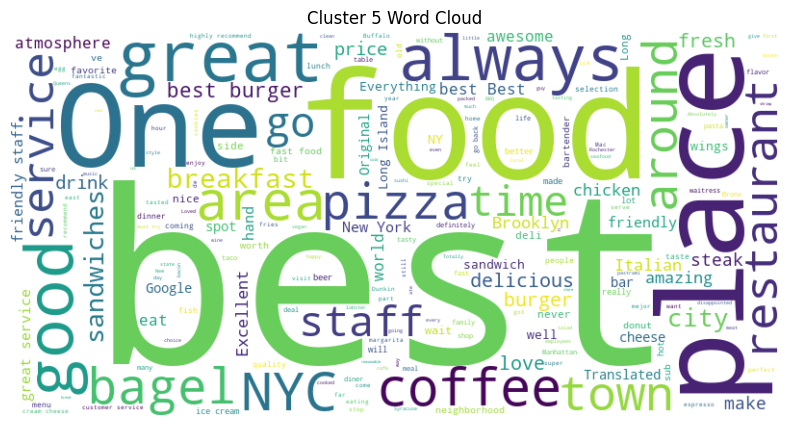

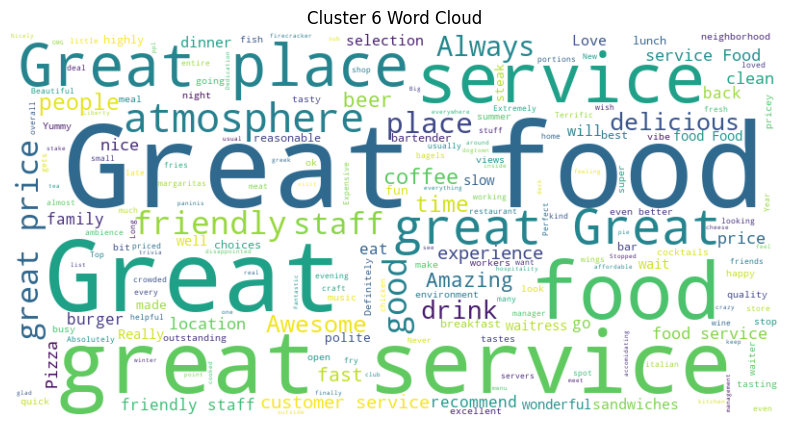

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds for each cluster
for cluster_label in range(best_n_clusters):
    cluster_text = ' '.join(df_sample[df_sample['cluster_label'] == cluster_label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_label} Word Cloud')
    plt.axis('off')
    plt.show()
